In [ ]:
import sys
sys.path.append('..')

# Regularisation basics

## Prerequisites
- [Bias, variance and generalisation]()

## Learning objectives
- Understand what is meant by regularisation
- Understand and implement the regularisation techniques:
    - early stopping
    - LASSO regression 
    - ridge regression (weight decay)

## Intro - What is regularisation?

**Regularisation is any technique that intends to reduce generalisation error**.

Equivalently, it is any technique that reduces overfitting.

There are many different ways to implement regularisation including:
- stopping training early
- adding penalty terms to the objective
- changing the model architecture

In this notebook we will implement some of these regularisation techniques.


## Early stopping

Early stopping is a technique in which you simply continue to train a model until you notice the generalisation error begin to increase.
At this point, the model is starting to overfit.
It can be implemented by intermittently storing parameter values at different points during training and then choosing to use those which had the best generalisation error.

![](images/early_stopping.jpg)


## Introducing norm penalties

### Norms

To recap, the $L^p$ ("L-p") norm is given by:

## $||x||_p = \sqrt[^p]{\Sigma_i|x_i|^p}$

### Norm penalties

Lasso regression and ridge regression are the types of regularisation that we will learn and implement next. 
They both involve adding a term, which is a norm penalty, to the loss function.

Take a look at the diagram below, which shows the adjusted loss function for linear regression, and consider what is the effect of the norm penalty?
How will it change the optimal parameterisation?

![](images/norm_penalty_loss.jpg)

### The effect of norm penalties

Norm penalties increase as the model parameters get larger.
What this does is reduce the model's tendency to depend on large expressions of any features.
This is beacuse to do so, a model would have to have a large corresponding weight to increase the influence of that feature on the output, but a norm penalty penalises that.

In the same way, it helps produce simpler models, which do not have 

Regularising our objective function additionally helps to reduce variance in our final model. This is because regularisation makes a model "prefer" certain parameterisations that might have performed equally well without, and as such we can more consistently produce the same result.




## Lasso regression (L1 regularisation)

Lasso regression = L1 regularisation 

Lasso regularisation penalises the objective by adding a L1 norm. This term is proportional to the sum of the **absolute** parameter values.

## $$||x||_1 = \Sigma_i|x_i|$$

![](images/lasso_loss.jpg)

The L1 regularisation penalty's contribution to the gradient of the loss with respect to the model parameters is constant. 
This means that regardless of the value of each parameter, it will contribute constantly to the gradient. 
Because we are most likely to be using a gradient based optimiser (probably SGD) which will update our model parameters by taking steps proportional to that gradient

The L1 regularisation term is not differentiable. It is only piecewise-differentiable either side of 0. So we will need to account for this when calculating the gradient in an optimisation procedure.

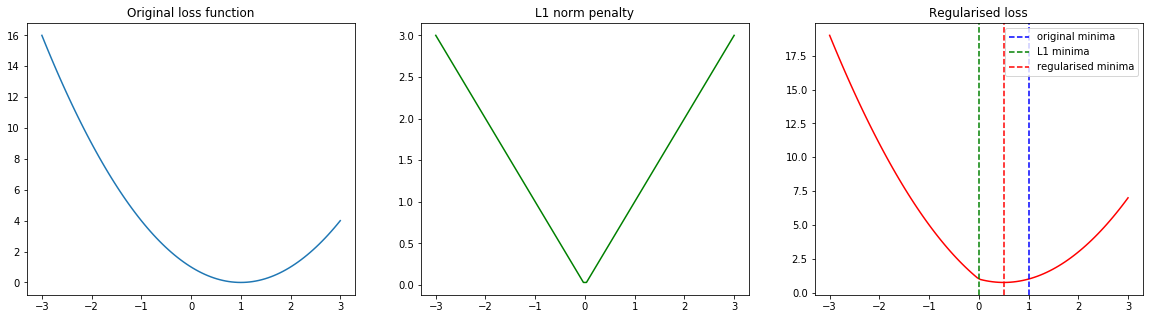

In [1]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2 # dummy loss function without weight decay regularisation

_lambda = 1
l1 = _lambda * np.abs(W)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l1, c='g')
ax2.set_title('L1 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l1, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L1 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

The minima of both the original loss function and the regularisation term attract the model weights towards them, because that's downhill.

Because the L1 norm will always push parameters to zero by the same amount (by contributing to the gradient constantly), only parameters whose influence on the model's prediction accuracy significantly will resist the pull all the way to zero.
What is meant by a "significant" increase in unregularised performance depends on the size of the regularisation factor; as the regularisation factor tends to infinity,the model parameter's optimal values will tend to zero.
As such, lasso regularisation can be used for feature selection; this is done by identifying the last few weights that drop below a threshold value as the regularisation factor is increased.


## Ridge regression (L2 regularisation)

Ridge regression = **squared** L2 regularisation 

As previously mentioned, the L2 norm is used so commonly in machine learning that it is often written with the norm subscript omitted.

## $$||x||_2 = ||x|| = \sqrt{\Sigma_i|x_i|^2}$$

For computational simplicity, we use the squared $L^2$ norm as the penalty.

![](images/ridge_loss.jpg)

Ridge regression penalises the objective by adding a L2 norm. This term is proportional to the sum of the **square** parameter values. Notice that the L2 norm calculates the euclidian distance of a vector.

![title](images/NN1_regularization.JPG)

Like L1 regularisation, L2 regularisation causes the loss to increase as the parameter values increase. However, unlike L1, increasing a parameter value whilst using L2 causes the rate of change of the loss with respect to that parameter to increase. This means that as the parameter gets larger, increasing it penalises the objective more.

Adding a regularisation term to the objective function alters the loss function, meaning that the optima may change.

It also prevents one feature repeatedly being increased more and more and dominating all influence on the output prediction. 
This is because as it gets larger, each unit increase penalises the model by an increasing amount.

Just as with lasso regression, changing the objective by adding an L2 norm regularisation penalty to implement ridge regression changes the loss function and its derivative, as shown below.
So the larger the weight values, the larger the cost, and also the larger the change in cost.




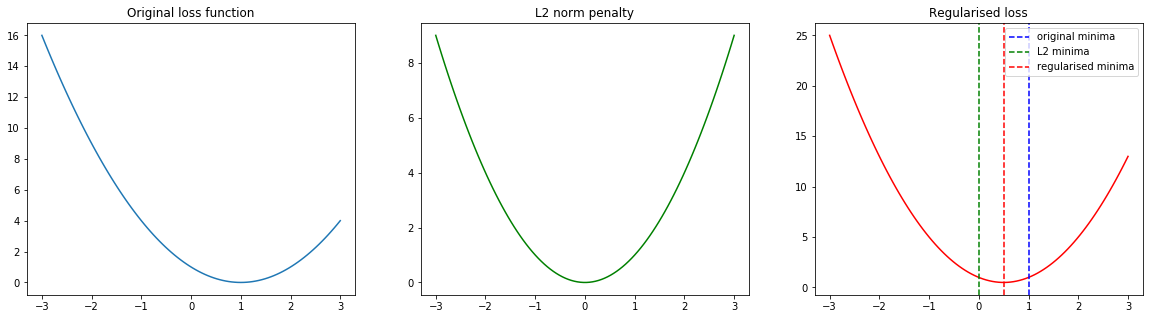

In [2]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 1
l2 = _lambda * W**2

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l2, c='g')
ax2.set_title('L2 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l2, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L2 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

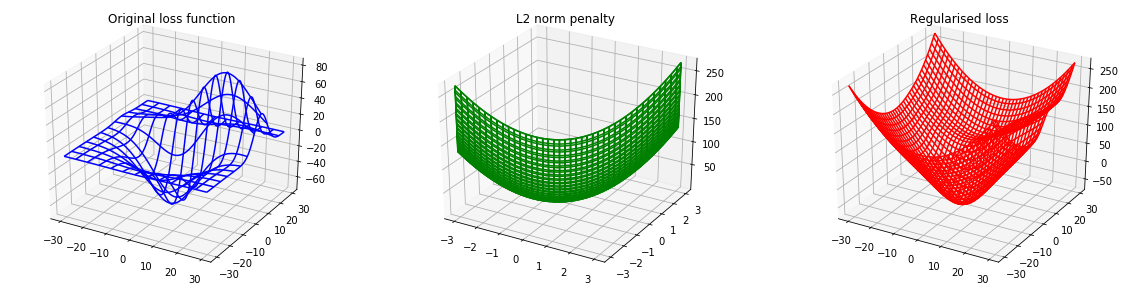

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 15
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
xx, yy = np.meshgrid(x, y)
l2 = _lambda * (xx**2 + yy**2)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131, projection='3d')
# ax1.plot(W, L)
ax1.set_title('Original loss function')
X, Y, Z = axes3d.get_test_data(0.05)
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='b')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('L2 norm penalty')

ax2.plot_wireframe(x, y, l2, color='g')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_wireframe(X, Y, Z + l2, color='r')
ax3.set_title('Regularised loss')

plt.show()

The graphs above also highlight how regularisation can reduce variance by making optima closer to the origin preferable to others.
If we started off on the far side of the blue hill, we would move our parameters down the far side, away from the global optima, and reach a flat plateau on the other side. When regularisation is added, a quadratic penalty is added to the loss as our parameters move away from the origin.
We can see in the red graph how regularisation guides the parameterisation toward the global optima.

It's easy to imagine about how this wouldn't work if the optima were not near the origin, as the increase in the regularisation penalty might outweigh the decrease in loss. In this case, we'd have to reduce the regularisation factor $\lambda$ if we still wanted to use $L^2$ regularisation.

poly([ 0.39429592  0.47449168 -1.92717276  1.76426877])
X: [ 0.72224918  0.98926976 -0.44067608  0.47685108  0.67722938  0.20840044
 -0.30889889 -0.38106128 -0.07680301  0.69761731  0.18877384  0.29949438
  0.50136157  0.0702001   0.86662651  0.99764103  0.00436356 -0.09643445
  0.37846151 -0.75682405] 

Y: [ 0.39639964  0.68574251 -0.34003061  0.37364301  0.37974717  0.42545002
  0.01183674 -0.16397715  0.34568643  0.38639828  0.42705999  0.41093693
  0.37010721  0.41871842  0.50643024  0.70138971  0.39632984  0.32903443
  0.39347567 -1.83346483] 

Ground truth coefficients: [ 0.39429592  0.47449168 -1.92717276  1.76426877] 



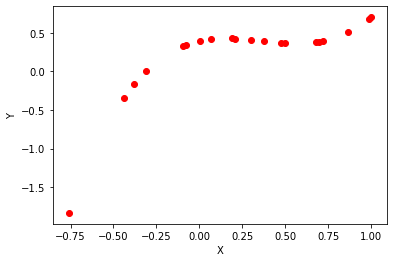

In [93]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def sample_polynomial_data(m=20, order=3, _range=1):
    coeffs = np.random.randn(order + 1) # initialise random coefficients for each order of the input + a constant offset
    print(Polynomial(coeffs))
    poly_func = np.vectorize(Polynomial(coeffs)) # 
    X = np.random.randn(m)
    X = np.random.uniform(low=-_range, high=_range, size=(m,))
    Y = poly_func(X)
    return X, Y, coeffs #returns X (the input), Y (labels) and coefficients for each power

m = 20 # how many examples do we want?
order = 3 # how many powers do we want to raise our input data to?
X, Y, ground_truth_coeffs = sample_polynomial_data(m, order)
print('X:',X, '\n')
print('Y:',Y, '\n')
print('Ground truth coefficients:', ground_truth_coeffs, '\n')
plot_data(X, Y)

class MultiVariableLinearHypothesis:
    def __init__(self, n_features, regularisation_factor): #add regularisation factor as parameter
        self.n_features = n_features
        self.regularisation_factor = regularisation_factor
        self.b = np.random.randn()
        self.w = np.random.randn(n_features)
        
    def __call__(self, X): # what happens when we call our model, input is of shape (n_examples, n_features)
        y_hat = np.matmul(X, self.w) + self.b # make prediction, now using vector of weights rather than a single value
        return y_hat # output is of shape (n_examples, 1)
    
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
        
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat-labels
        dLdw = 2 * np.array([np.sum(diffs * X[:, i]) / m for i in range(self.n_features)]) + self.regularisation_factor*self.w # add regularisation gradient
        dLdb = 2 * np.sum(diffs) / m
        return dLdw, dLdb

def create_polynomial_inputs(X, order=3):
    new_dataset = np.array([np.power(X, i) for i in range(1, order + 1)]).T
    return new_dataset # new_dataset should be shape [m, order]

def train(num_epochs, X, Y, H):
    for e in range(num_epochs): # for this many complete runs through the dataset
        y_hat = H(X) # make predictions
        dLdw, dLdb = H.calc_deriv(X, y_hat, Y) # calculate gradient of current loss with respect to model parameters
        new_w = H.w - learning_rate * dLdw # compute new model weight using gradient descent update rule
        new_b = H.b - learning_rate * dLdb # compute new model bias using gradient descent update rule
#       norm = np.linalg.norm([[new_w - H.w], [new_b - H.w]], 2)
        H.update_params(new_w, new_b) # update model weight and bias
#     print(f'THE MODEL DIDNT CONVERGE IN {num_epochs} EPOCHS')
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Prediction', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

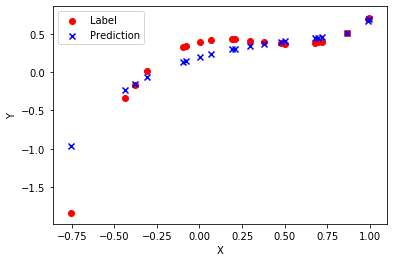

[ 0.6237514  -0.55400174  0.36789829 -0.30266977  0.21288768 -0.14958104
  0.12160622 -0.0651448   0.08755956 -0.02107724  0.06666018 -0.00316387
  0.05367256  0.01584983  0.04233076]


In [94]:
num_epochs = 500
learning_rate = 0.1
regularisation_factor = 0.1
highest_order_power = 15

polynomial_augmented_inputs = create_polynomial_inputs(X, highest_order_power) # need normalisation to put higher coefficient variables on the same order of magnitude as the others
H = MultiVariableLinearHypothesis(n_features=highest_order_power, regularisation_factor=regularisation_factor)

train(num_epochs, polynomial_augmented_inputs, Y, H)
plot_h_vs_y(X, H(polynomial_augmented_inputs), Y)
print(H.w)

## Next steps
- Play with the regularisation factor in the cell above and learn how it affects the fit of the curve

## Challenges
- Use early stopping when training a model to optimise for generalisation error
- Implement lasso regression to find the most important features of the wine dataset